<a href="https://colab.research.google.com/github/robimalco/COVID19_analysis/blob/master/CoronaVirusITALY_REGIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEFINE LIBRARIES**

In [0]:
import pandas as pd
import io
import numpy as np
import requests
from google.colab import files
pd.options.mode.chained_assignment = None

#GEODATA
import os
import folium
from folium import plugins

! pip install geopandas

import geopandas as gpd

# **DOWNLOAD REGION DATA**

In [0]:
url_first_part = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-'

file_dates = [
              '20200224.csv', '20200225.csv', '20200226.csv', '20200227.csv', '20200228.csv', '20200229.csv',   
              '20200301.csv', '20200302.csv', '20200303.csv', '20200304.csv', '20200305.csv', '20200306.csv',
              '20200307.csv', '20200308.csv', '20200309.csv', '20200310.csv', '20200311.csv', '20200312.csv',
              '20200313.csv', '20200314.csv', '20200315.csv', '20200316.csv', '20200317.csv', '20200318.csv',
              '20200319.csv', '20200320.csv', '20200321.csv', '20200322.csv', '20200323.csv', '20200324.csv',
              '20200325.csv', '20200326.csv', '20200327.csv', '20200328.csv', '20200329.csv', '20200330.csv',
              '20200331.csv', '20200401.csv', '20200402.csv', '20200403.csv', '20200404.csv', '20200405.csv',
              '20200406.csv', '20200407.csv', '20200408.csv', '20200409.csv', '20200410.csv', '20200411.csv',
              '20200412.csv', '20200413.csv', '20200414.csv', '20200415.csv', '20200416.csv', '20200417.csv',
              '20200418.csv', '20200419.csv', '20200420.csv', '20200421.csv', '20200422.csv', '20200423.csv',
              '20200424.csv', '20200425.csv', '20200426.csv', '20200427.csv', '20200428.csv', '20200429.csv']

full_data_list = []

for i in range(0, len(file_dates)):
  url_complete = url_first_part + file_dates[i]
  response = requests.get(url_complete).content
  temp_df = pd.read_csv(io.StringIO(response.decode('utf-8')))
  full_data_list.append(temp_df)

df = pd.concat(full_data_list, ignore_index=True)

# df.to_csv('df.csv')
# files.download('df.csv')

# **DOWNLOAD INHABITANTS PER REGION**

In [0]:
from bs4 import BeautifulSoup
import requests
html = requests.get('http://www.comuni-italiani.it/regionip.html').text
soup = BeautifulSoup(html)
region_names = soup.select('table.tabwrap')[0].findAll('a')
region_populations = soup.select('table.tabwrap')[0].findAll('td', {'align': 'right', 'width': '18%'})
df_region_inhabitants = pd.DataFrame(columns=['denominazione_regione', 'inhabitants'])
for i in range(0, len(region_names)):
  df_region_inhabitants = df_region_inhabitants.append({
      'denominazione_regione': region_names[i].getText(),
      'inhabitants': int(region_populations[i].getText().replace('.', ''))
      }, ignore_index=True)

# **DOWNLOAD GEODATA**

In [0]:
# Download Geodata
file_name = 'https://raw.githubusercontent.com/stefanocudini/leaflet-geojson-selector/master/examples/italy-regions.json'
regional_geo_data = gpd.read_file(file_name)
regional_geo_data['reg_name'] = regional_geo_data['name']

# **FIX INCONSISTENCIES BETWEEN REGIONS' NAMES**

In [0]:
df.loc[(df['denominazione_regione'] == 'P.A. Trento'), 'denominazione_regione'] = 'Trentino-Alto Adige'
df.loc[(df['denominazione_regione'] == 'P.A. Bolzano'), 'denominazione_regione'] = 'Trentino-Alto Adige'
# df.loc[(df['denominazione_regione'] == 'Emilia-Romagna'), 'denominazione_regione'] = 'Emilia Romagna'

df_region_inhabitants.loc[(df_region_inhabitants['denominazione_regione'] == 'Friuli-Venezia Giulia'), 'denominazione_regione'] = 'Friuli Venezia Giulia'

regional_geo_data.loc[(regional_geo_data['reg_name'] == 'basilicata'), 'reg_name'] = 'Basilicata'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'calabria'), 'reg_name'] = 'Calabria'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'campania'), 'reg_name'] = 'Campania'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'piemonte'), 'reg_name'] = 'Piemonte'
regional_geo_data.loc[(regional_geo_data['reg_name'] == "valle d'aosta"), 'reg_name'] = "Valle d'Aosta"
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'lombardia'), 'reg_name'] = 'Lombardia'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'trentino-alto adige/sudtirol'), 'reg_name'] = 'Trentino-Alto Adige'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'veneto'), 'reg_name'] = 'Veneto'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'friuli venezia giulia'), 'reg_name'] = 'Friuli Venezia Giulia'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'liguria'), 'reg_name'] = 'Liguria'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'emilia-romagna'), 'reg_name'] = 'Emilia-Romagna'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'toscana'), 'reg_name'] = 'Toscana'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'umbria'), 'reg_name'] = 'Umbria'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'marche'), 'reg_name'] = 'Marche'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'lazio'), 'reg_name'] = 'Lazio'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'molise'), 'reg_name'] = 'Molise'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'abruzzo'), 'reg_name'] = 'Abruzzo'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'puglia'), 'reg_name'] = 'Puglia'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'sicilia'), 'reg_name'] = 'Sicilia'
regional_geo_data.loc[(regional_geo_data['reg_name'] == 'sardegna'), 'reg_name'] = 'Sardegna'

# **FILTER, MERGE AND GROUP DATA**

In [0]:
# Create copy of df to avoid not useful re-estraction
region_df = df

# Merge tables
region_df = region_df.merge(df_region_inhabitants, on='denominazione_regione')

# Group by Country in order to avoid split by province/region
region_df = region_df.groupby(['denominazione_regione', 'data']).agg({
    'ricoverati_con_sintomi':'sum',
    'terapia_intensiva':'sum',
    'totale_ospedalizzati':'sum',
    'isolamento_domiciliare':'sum',
    'totale_positivi':'sum',
    'variazione_totale_positivi':'sum',
    'nuovi_positivi':'sum',
    'dimessi_guariti':'sum',
    'deceduti':'sum',
    'totale_casi': 'sum',
    'tamponi':'sum',
    'inhabitants': 'sum'}).reset_index()

# **ADD NEW INTERESTING COLUMNS**

In [0]:
region_df['tamponi/tot_casi'] = region_df['tamponi'] / region_df['totale_casi']
region_df['positivi'] = region_df['totale_casi'] - region_df['dimessi_guariti'] - region_df['deceduti']
region_df['inhabitants/tot_case'] = region_df['inhabitants'] / region_df['totale_casi']
region_df['inhabitants/tamponi'] = region_df['inhabitants'] / region_df['tamponi']

# **ANALYZE DATA**

In [0]:
kpi_columns = [item for item in list(region_df.columns) if item not in ['denominazione_regione', 'data', 'days_from_last_obs']]

ok_region_df = pd.DataFrame()

region_df['days_from_last_obs'] = (pd.to_datetime(region_df.data.max()) - pd.to_datetime(region_df.data, errors='coerce')).dt.days
temp_region_df = region_df.sort_values(by=['denominazione_regione', 'days_from_last_obs'], ascending=[False, False])

for q in range(0, len(kpi_columns)):
  temp_region_df[kpi_columns[q]] = temp_region_df[kpi_columns[q]].fillna(0).replace([np.inf, -np.inf], 0).astype(int)
  temp_region_df['d_' + kpi_columns[q]] = temp_region_df.groupby(['denominazione_regione'])[kpi_columns[q]].diff().fillna(0).replace([np.inf, -np.inf], 0).astype(int)
  temp_region_df['dp_' + kpi_columns[q]] = temp_region_df.groupby(['denominazione_regione'])[kpi_columns[q]].pct_change().apply(lambda x: round(x, 2)* 100).fillna(0).replace([np.inf, -np.inf], 0).astype(int)
ok_region_df = ok_region_df.append(temp_region_df)

# **ANALISY OF WHOLE ITALY**

In [0]:
ok_region_df[ok_region_df.days_from_last_obs < 7].groupby(['data']).agg({
    'nuovi_positivi':'sum',
    'd_nuovi_positivi':'sum',
    'dimessi_guariti':'sum',
    'd_dimessi_guariti':'sum',
    'deceduti':'sum',
    'd_deceduti':'sum',
    'totale_casi': 'sum',
    'd_totale_casi': 'sum',
    'tamponi':'sum',
    'd_tamponi': 'sum'}).reset_index()

# **SHOW RECAP**

In [0]:
COLUMNS_TO_DISPLAY = ['denominazione_regione', 'days_from_last_obs', 'totale_casi', 'd_totale_casi', 'deceduti', 'd_deceduti', 'tamponi', 'd_tamponi']

DAYS_AGO = 0 # 0 is the last data point

ok_region_df_recap = ok_region_df[COLUMNS_TO_DISPLAY]
ok_region_df_recap[ok_region_df_recap['days_from_last_obs'] == DAYS_AGO].sort_values('denominazione_regione')

# **SHOW PIVOT**

In [0]:
PIVOT_MAIN_KPI = 'nuovi_positivi'

LAST_n_DAYS = 10

ok_region_df_for_pivot = ok_region_df.groupby(['denominazione_regione', 'days_from_last_obs']).last().reset_index()
ok_region_df_pivot = ok_region_df_for_pivot.pivot(index='denominazione_regione', columns='days_from_last_obs', values=[PIVOT_MAIN_KPI]).fillna(0)
ok_region_df_pivot[ok_region_df_pivot.columns[::-1][len(list(ok_region_df_pivot.columns))-LAST_n_DAYS:]]

# **SHOW INTERESTING PURE NUMBERS**



In [12]:
VAR_1 = 'totale_casi'
VAR_2 = 'tamponi'

correlation = round(df[VAR_1].corr(df[VAR_2]), 2)
print('Correlation ' + VAR_1 + ' ' + VAR_2 + ': ' + str(correlation))

Correlation totale_casi tamponi: 0.82


# **MULTI PLOT TRENDLINE**

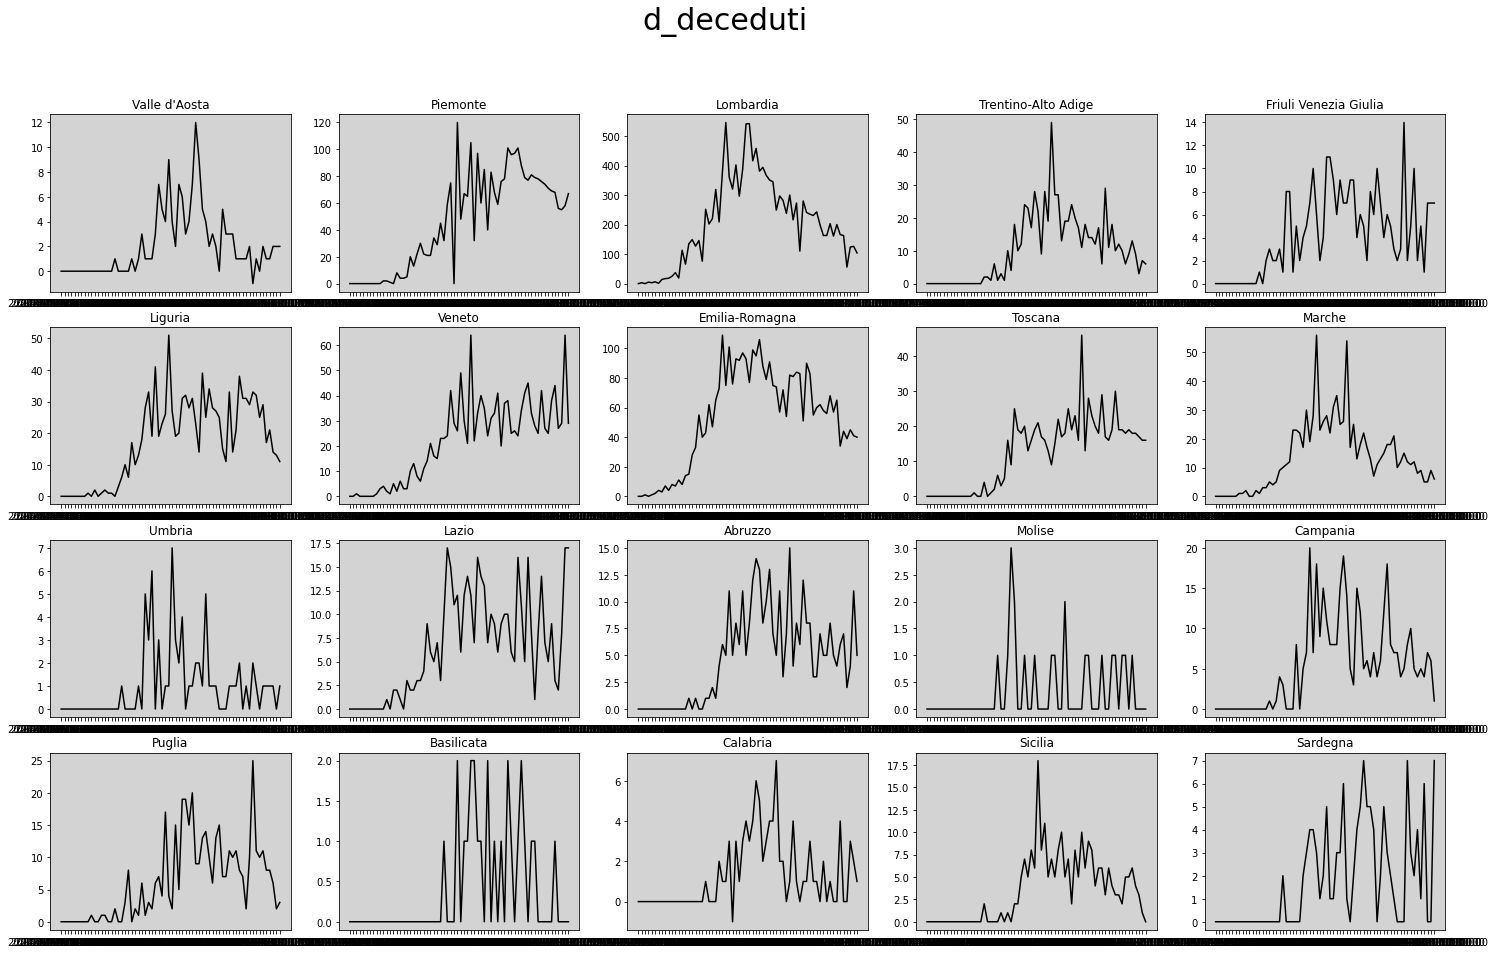

In [15]:
KPI_multi_plot = 'd_deceduti'

import matplotlib.pyplot as plt
import numpy as np

regions_map = {
    "Valle d'Aosta": [0, 0],
    'Piemonte': [0, 1],
    'Lombardia': [0, 2],
    'Trentino-Alto Adige': [0, 3],
    'Friuli Venezia Giulia': [0, 4],
    'Liguria': [1, 0],
    'Veneto': [1, 1],
    'Emilia-Romagna': [1, 2],
    'Toscana': [1, 3],
    'Marche': [1, 4],
    'Umbria': [2, 0],
    'Lazio': [2, 1],
    'Abruzzo': [2, 2],
    'Molise': [2, 3],
    'Campania': [2, 4],
    'Puglia': [3, 0],
    'Basilicata': [3, 1],
    'Calabria': [3, 2],
    'Sicilia': [3, 3],
    'Sardegna': [3, 4],
}

fig, ax = plt.subplots(4, 5, figsize=(25,15))

fig.suptitle(KPI_multi_plot, fontsize=30)

x_axis = ok_region_df.data.unique()

for region_map in regions_map:
  temp_y = ok_region_df[ok_region_df.denominazione_regione == region_map][KPI_multi_plot]
  temp_ax = ax[regions_map[region_map][0], regions_map[region_map][1]]
  temp_ax.plot(x_axis, temp_y, 'black')
  temp_ax.set_title(region_map, color='black')
  temp_ax.patch.set_facecolor('lightgray')
  temp_ax.tick_params(axis='y', colors='black')
fig.show()

# **PLOT GEODATA**

In [14]:
KPI_MAP = 'dp_totale_casi'
DAYS_AGO = 0 # 0 is the last data point

map_italy = folium.Map([41.9028, 12.4964], zoom_start=6)

popups = ok_region_df[ok_region_df['days_from_last_obs'] == DAYS_AGO]
popups = popups[['denominazione_regione', KPI_MAP]]

popups.columns = ['reg_name', KPI_MAP]
# popups['reg_name'] = popups['reg_name'].str.lower()

regional_geo_data_short = regional_geo_data.merge(popups,on="reg_name")

regional_geo_data_short = regional_geo_data_short[['reg_name', KPI_MAP, 'geometry']]

folium.Choropleth(
    geo_data=regional_geo_data_short,
    data=regional_geo_data_short,
    columns=['reg_name', KPI_MAP],
    key_on='feature.properties.reg_name',
    fill_color='YlOrRd'
).add_to(map_italy)

style_function = lambda x: {
    'fillColor': '#ffffff',
    'color':'#000000', 
    'fillOpacity': 0.1,
    'weight': 0.1}
highlight_function = lambda x: {
    'fillColor': '#000000',
    'color':'#000000',
    'fillOpacity': 0.50,
    'weight': 0.1}
NIL = folium.features.GeoJson(
    regional_geo_data_short,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['reg_name', KPI_MAP],
        aliases=['reg_name: ', KPI_MAP + ' : '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
map_italy.add_child(NIL)
map_italy.keep_in_front(NIL)

map_italy